# Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

Important:
Tingues en compte que prèviament et caldrà preparar el dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from kneed import KneeLocator

Publi_facebook = pd.read_csv('C:\\RAUL\\NISSAN\\GENERAL\\USB\\FORMACION\\BootCamp - Data Scientist_Analist\\IT Academy Cibernarium - Data Science\\Data Science Itinerario\\8.- Alg. NO supervisado. Agrupacion\\4.- Entrega\\Publicacions Facebook Thailandia.csv')
Publi_facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
Publi_facebook.shape

(7050, 16)

In [4]:
Publi_facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Podem veure que les 4 últimes columnes estàn vuides per tant les esborrarem per no tenir-les en conte als exercicis.
Pel que fa a la resta de camps no numérics tenim els següents:
* **status_id:** es tracta d'un codi separat per un guió baix, pel que s'hauria de veure si separant tots dos podem treure més informació.
* **status_type:** és una variable categórica que podem transformar en numérica
* **status_published:** és la data de publicació però al importar el csv l'ha agafat com a objecte en lloc de data i es podria canviar al format correcte.

In [5]:
# status_id: 
Publi_facebook[['status_id_1', 'status_id_2']]=Publi_facebook['status_id'].str.split('_', expand=True)


In [6]:
# status_type: 
# Codifiquem les columnes de 'status_type' que és categòrica
le = LabelEncoder()
Publi_facebook['status_type'] = le.fit_transform(Publi_facebook['status_type'].values)

In [7]:
# status_published
Publi_facebook['status_published'] = pd.to_datetime(Publi_facebook['status_published'])

In [8]:
Publi_facebook.describe(include='all').T

C:\Users\rauga\AppData\Local\Temp\ipykernel_19580\321635728.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Publi_facebook.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
status_id,7050,6997,819700534875473_957599447752247,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_type,7050.0,NaN,NaN,NaN,NaT,NaT,1.704965,0.942399,0.0,1.0,1.0,3.0,3.0
status_published,7050,6913,2018-03-20 01:54:00,3,2012-07-15 02:51:00,2018-06-13 01:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_reactions,7050.0,NaN,NaN,NaN,NaT,NaT,230.117163,462.625309,0.0,17.0,59.5,219.0,4710.0
num_comments,7050.0,NaN,NaN,NaN,NaT,NaT,224.356028,889.63682,0.0,0.0,4.0,23.0,20990.0
num_shares,7050.0,NaN,NaN,NaN,NaT,NaT,40.022553,131.599965,0.0,0.0,0.0,4.0,3424.0
num_likes,7050.0,NaN,NaN,NaN,NaT,NaT,215.043121,449.472357,0.0,17.0,58.0,184.75,4710.0
num_loves,7050.0,NaN,NaN,NaN,NaT,NaT,12.728652,39.97293,0.0,0.0,0.0,3.0,657.0
num_wows,7050.0,NaN,NaN,NaN,NaT,NaT,1.289362,8.71965,0.0,0.0,0.0,0.0,278.0
num_hahas,7050.0,NaN,NaN,NaN,NaT,NaT,0.696454,3.957183,0.0,0.0,0.0,0.0,157.0


In [9]:
Publi_facebook.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4,status_id_1,status_id_2
0,246675545449582_1649696485147474,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN,246675545449582,1649696485147474
1,246675545449582_1649426988507757,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN,246675545449582,1649426988507757
2,246675545449582_1648730588577397,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN,246675545449582,1648730588577397
3,246675545449582_1648576705259452,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN,246675545449582,1648576705259452
4,246675545449582_1645700502213739,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN,246675545449582,1645700502213739


Després de fer els canvis sobre els camps indicats, veiem que dels dos fragments corresponents al id, un dells té una diversitat de 9 per tant podria ser util pels següents passos. En canvi el id original i el segon fragment a priori no aportant res i per tant els eliminarem juntament amb les 4 columnes finals. 

In [10]:
# Eliminem les columnes buides o que no aporten res al model.
Publi_facebook.drop(['status_id', 'status_id_2', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [11]:
# Per simplificar, codificarem els valors del camp 'status id_1'
Publi_facebook['status_id_1'] = le.fit_transform(Publi_facebook['status_id_1'].values)

In [12]:
Publi_facebook[['status_type', 'status_published', 'status_id_1']].head()

,status_type,status_published,status_id_1
0,3,2018-04-22 06:00:00,4
1,1,2018-04-21 22:45:00,4
2,3,2018-04-21 06:17:00,4
3,1,2018-04-21 02:29:00,4
4,1,2018-04-18 03:22:00,4


In [13]:
Publi_facebook[['status_type', 'status_published', 'status_id_1']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       7050 non-null   int32         
 1   status_published  7050 non-null   datetime64[ns]
 2   status_id_1       7050 non-null   int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 110.3 KB


In [14]:
Publi_facebook.shape

(7050, 12)

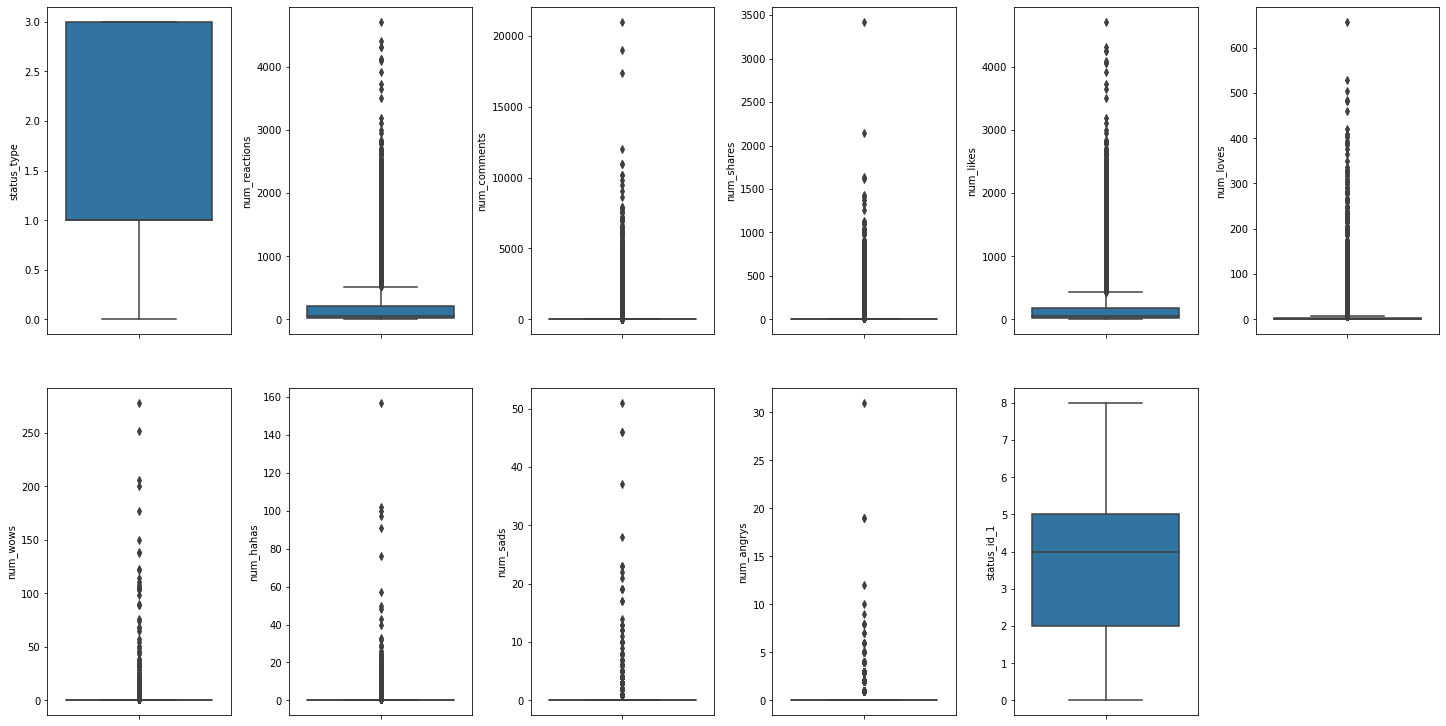

In [15]:
# Fem gràfic de Boxplot de tots els camps del dataframe menys 'status_published' que són dates

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in Publi_facebook[Publi_facebook.columns.drop('status_published')].items():
    sns.boxplot(y=k, data=Publi_facebook[Publi_facebook.columns.drop('status_published')], ax=axs[index])
    index += 1

axs[-1].axis('off') #Esborrem els exios de l'últim gràfic
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

La majoria dels camps ténen outliers, per tant s'haurà de tenir en conte a l'hora de fer l'scalat.

Text(0.5, 1.0, 'Matriu de Correl.lació')

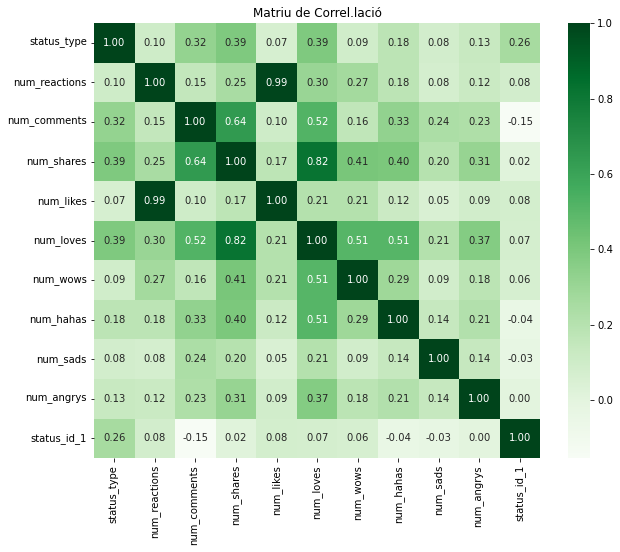

In [16]:
correletion= Publi_facebook.corr().round(4)

f, axes = plt.subplots(1, 1, figsize=(10, 8))

ax0=sns.heatmap(correletion, fmt='.2f', annot=True, cbar=True, annot_kws={'size':10}, cmap='Greens')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_yticklabels(ax0.get_yticklabels(),rotation=0)
ax0.set_title("Matriu de Correl.lació")

Revisant la matriu de correl.lació trobem que hi ha una relació directa entre el num_reactions i el num_likes. També hi ha una relació molt forta entre el num_likes i num_shares.

* **Escalat:** com que he vist que gairebé tots els camps ténen outliers, aplicarem el RobustScaler que és més adient

In [17]:
# Fem escalat de les dades sense tenir en conte el camp de 'status_published'
Publi_facebook_net=Publi_facebook[Publi_facebook.columns.drop('status_published')]

scaled_features = RobustScaler().fit_transform(Publi_facebook_net)
Publi_facebook_scaled = pd.DataFrame(scaled_features, columns=Publi_facebook_net.columns) #Fem un df amb les dades escalades

* **PCA:** apliquem el PCA per millorar la velocitat de l'agoritme

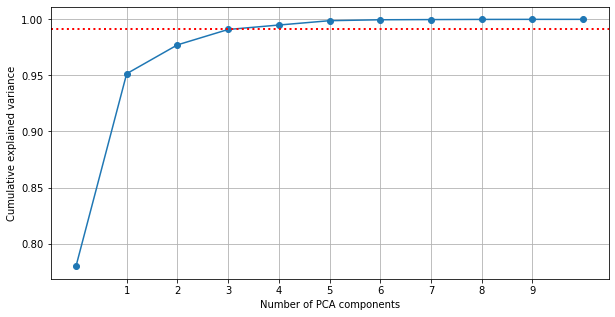

In [18]:
pca = PCA().fit(Publi_facebook_scaled)

plt.figure(figsize=(10,5))
ax=plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.xticks(range(1,10))
plt.axhline(y = np.cumsum(pca.explained_variance_ratio_)[3], color = 'red', linewidth =2, ls = ':' )
plt.grid()
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative explained variance');

In [19]:
valors_pca= PCA(n_components=10).fit(Publi_facebook_scaled)
valors_pca.explained_variance_ratio_.cumsum()

# Veiem que un valor de n=4 aconseguim reterin un 99% de la variança, per tant farem servir n=4 pel nostre model
pca_final= PCA(n_components=4).fit_transform(Publi_facebook_scaled)
Publi_facebook_pca = pd.DataFrame(pca_final, columns=['Component_1','Component_2','Component_3','Component_4'])

## K-Means Model

* Elbow method

In [20]:
# Apliquem el model K-means de forma iterada per trobar el valor óptim del nombre de clusters en funció del SSE
kmeans_kwargs = {
                "init": "random",
                "n_init": 10,
                "max_iter": 300,
                "random_state": 42,
                }

# Fem la llista dels valors de SSE per cada k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Publi_facebook_pca)
    sse.append(kmeans.inertia_)

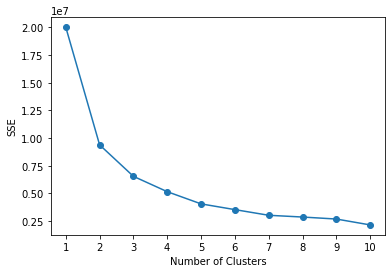

In [21]:
plt.plot(range(1, 11), sse, marker='o', linestyle='-')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Visualment sembla que el nombre de cluster a triar seria 3, pero ho reconfirmem amb el KneeLocator

In [22]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

# Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [23]:
# En aquest cas podem partir ja de les dades preprocesades escalades i passades pel PCA per fer el model jeràrquic

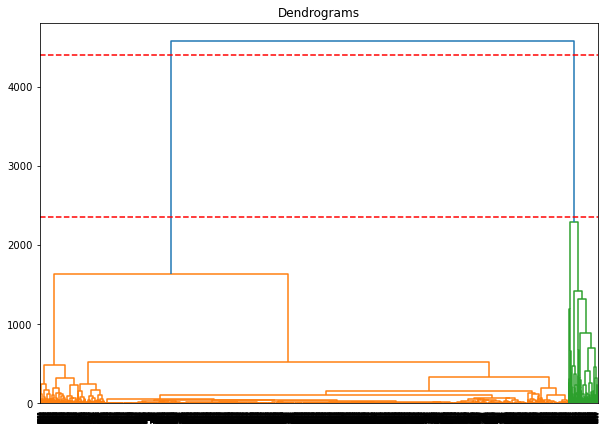

In [24]:
# Començem fent un dendograma per decidir el nombre de clusters
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(Publi_facebook_scaled, method='ward'))
plt.axhline(y=4400, color='r', linestyle='--')
plt.axhline(y=2350, color='r', linestyle='--')

In [25]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(Publi_facebook_scaled)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

# Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [26]:
hiera_kwargs = {
                'affinity':'euclidean',
                'linkage':'ward',
               }

In [33]:
# Fem la llista dels coeficients Silhoutte per cada k
array_silhouette=np.zeros((9,5)) #inicialitzem l'arry amb zeros  

# Fem un bucle per treure els valors de Silhoutte per cada model i dades d'entrada
for k in range(0, 9):
    kmeans_sca = KMeans(n_clusters=k+2, **kmeans_kwargs).fit(Publi_facebook_scaled)
    kmeans_score_sca = silhouette_score(Publi_facebook_scaled, kmeans_sca.labels_)
    
    kmeans_pca = KMeans(n_clusters=k+2, **kmeans_kwargs).fit(Publi_facebook_pca)
    kmeans_score_pca = silhouette_score(Publi_facebook_pca, kmeans_pca.labels_)   

    hiera_sca = AgglomerativeClustering(n_clusters=k+2, **hiera_kwargs).fit(Publi_facebook_scaled)
    hiera_score_sca = silhouette_score(Publi_facebook_scaled, hiera_sca.labels_)
    
    hiera_pca = AgglomerativeClustering(n_clusters=k+2, **hiera_kwargs).fit(Publi_facebook_pca)
    hiera_score_pca = silhouette_score(Publi_facebook_pca, hiera_pca.labels_)   
    
    array_silhouette[k,0]=int(k+2)
    array_silhouette[k,1]=kmeans_score_sca
    array_silhouette[k,2]=kmeans_score_pca
    array_silhouette[k,3]=hiera_score_sca
    array_silhouette[k,4]=hiera_score_pca
    

In [34]:
metrics_df = pd.DataFrame( data = array_silhouette, columns = ['n-Clusters', 'K-means_Scaled', 'K-means_PCA', 'Hierar_Scaled', 'Hiera_PCA'])
metrics_df['n-Clusters'] = metrics_df['n-Clusters'].astype('int')
metrics_df.round(4)

,n-Clusters,K-means_Scaled,K-means_PCA,Hierar_Scaled,Hiera_PCA
0,2,0.8879,0.8959,0.8809,0.9051
1,3,0.8519,0.8664,0.8733,0.8381
2,4,0.8238,0.8494,0.8022,0.8423
3,5,0.8318,0.8563,0.8074,0.8432
4,6,0.8193,0.8469,0.8099,0.8433
5,7,0.8147,0.8460,0.8106,0.8433
6,8,0.7778,0.8212,0.8127,0.8360
7,9,0.7775,0.8217,0.8117,0.8370
8,10,0.6746,0.8177,0.8118,0.8371


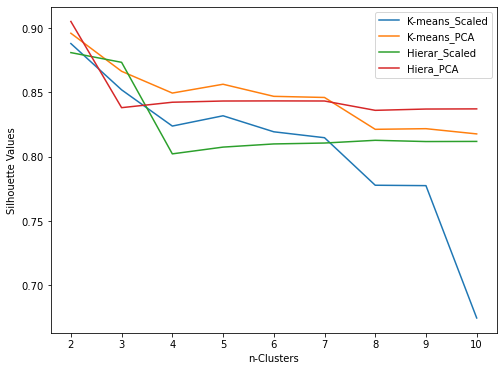

In [35]:
import matplotlib.ticker as ticker

columns_plot = ['K-means_Scaled', 'K-means_PCA', 'Hierar_Scaled', 'Hiera_PCA']

fig, ax = plt.subplots(figsize=(8, 6))
#ax.yaxis.set_major_formatter(ticker.EngFormatter())
for each in columns_plot:
    sns.lineplot(data = metrics_df, x = 'n-Clusters', y = each, label = str(each), ci = None)
plt.ylabel("Silhouette Values")
plt.legend()
plt.show()

**Conclusions:**  
Segons els valors de Silhoutte, el millor resultat s'aconsegueix amb els models fets amb dades procesades amb PCA. A banda del K-means Scaled, els altres 3 comencen a prop del 0,90 i van baixant però s'estabilitzen a la franja 0.85-0.80.
En els 4 models la conclussión seria que model de 2 clusters és el que millors resultats obté.